<a href="https://colab.research.google.com/github/SagarZende494/Air_Quality_Analysis/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("aqi_india_2024_2025.csv")
df.head()

,City,State,Date,AQI,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),O3 (µg/m³)
0,Delhi,Delhi,2024-01-01,381,47.482643,294.479173,95.741292,12.517142,3.543169,65.282272
1,Delhi,Delhi,2024-02-01,199,13.541876,54.267153,99.544609,6.237707,3.364966,136.177099
2,Delhi,Delhi,2024-03-01,259,152.173279,159.008376,35.142620,33.225466,4.177638,21.548207
3,Delhi,Delhi,2024-04-01,396,31.378350,56.725990,49.504599,17.158585,2.598893,57.210829
4,Delhi,Delhi,2024-05-01,137,24.644346,244.906789,14.961433,60.068169,4.663532,54.802149


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           240 non-null    object 
 1   State          240 non-null    object 
 2   Date           240 non-null    object 
 3   AQI            240 non-null    int64  
 4   PM2.5 (µg/m³)  240 non-null    float64
 5   PM10 (µg/m³)   240 non-null    float64
 6   NO2 (µg/m³)    240 non-null    float64
 7   SO2 (µg/m³)    240 non-null    float64
 8   CO (mg/m³)     240 non-null    float64
 9   O3 (µg/m³)     240 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 18.9+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ["City", "State"]:
  df[i]=le.fit_transform(df[i])

In [6]:
df.head()

,City,State,Date,AQI,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),O3 (µg/m³)
0,3,0,2024-01-01,381,47.482643,294.479173,95.741292,12.517142,3.543169,65.282272
1,3,0,2024-02-01,199,13.541876,54.267153,99.544609,6.237707,3.364966,136.177099
2,3,0,2024-03-01,259,152.173279,159.008376,35.142620,33.225466,4.177638,21.548207
3,3,0,2024-04-01,396,31.378350,56.725990,49.504599,17.158585,2.598893,57.210829
4,3,0,2024-05-01,137,24.644346,244.906789,14.961433,60.068169,4.663532,54.802149


In [7]:
df.describe()

,City,State,AQI,PM2.5 (µg/m³),PM10 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),O3 (µg/m³)
count,240.000000,240.00000,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,4.500000,3.90000,224.33750,107.317427,162.149745,51.259413,41.184835,2.372663,93.537332
std,2.878284,2.47295,98.84906,57.227621,85.397748,27.069778,22.293202,1.385569,48.985575
min,0.000000,0.00000,51.00000,10.102753,21.295007,5.360087,2.489111,0.141950,10.177357
25%,2.000000,2.00000,138.00000,52.116468,85.746050,27.235298,22.792858,1.283308,50.882916
50%,4.500000,3.50000,225.50000,109.479281,169.084456,53.218004,41.468137,2.051852,93.784786
75%,7.000000,6.00000,307.25000,158.460108,239.456872,73.043263,60.210924,3.551396,131.551649
max,9.000000,8.00000,400.00000,199.097696,299.599105,99.956759,79.861070,4.987750,177.904523


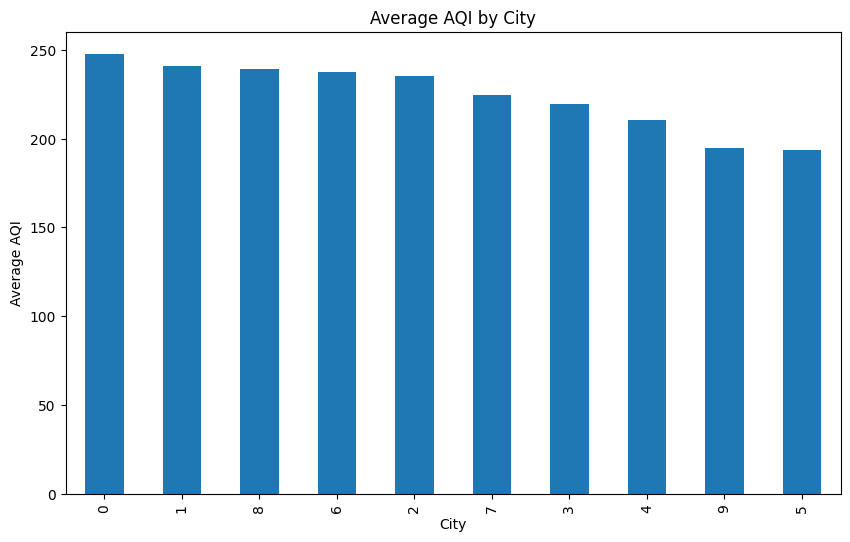

In [8]:
# City-wise average AQI
city_avg_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)
city_avg_aqi.plot(kind='bar', figsize=(10, 6))
plt.title('Average AQI by City')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.show()

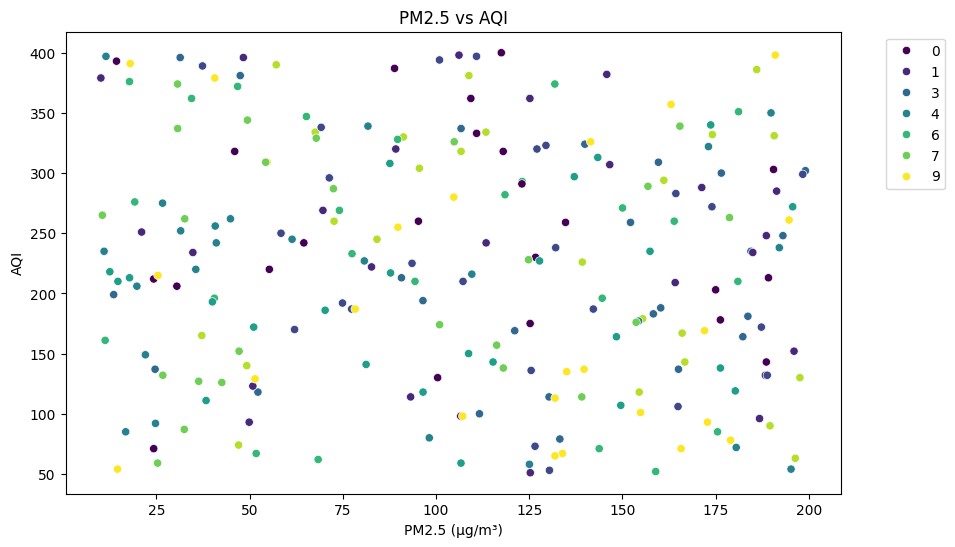

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM2.5 (µg/m³)', y='AQI', data=df, hue='City', palette='viridis')
plt.title('PM2.5 vs AQI')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('AQI')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [10]:
# Unique cities
print(f"Unique Cities: {df['City'].unique()}")

# Unique states
print(f"Unique States: {df['State'].unique()}")

Unique Cities: [3 8 1 6 2 4 0 9 5 7]
Unique States: [0 3 2 8 5 6 1 4 7]


In [11]:
# Filter data for Delhi
delhi_data = df[df['City'] == 'Delhi']
print(delhi_data.head())

# Filter data where AQI > 300
high_aqi_data = df[df['AQI'] > 300]
print(high_aqi_data.head())

Empty DataFrame
Columns: [City, State, Date, AQI, PM2.5 (µg/m³), PM10 (µg/m³), NO2 (µg/m³), SO2 (µg/m³), CO (mg/m³), O3 (µg/m³)]
Index: []
    City  State        Date  AQI  PM2.5 (µg/m³)  PM10 (µg/m³)  NO2 (µg/m³)  \
0      3      0  2024-01-01  381      47.482643    294.479173    95.741292   
3      3      0  2024-04-01  396      31.378350     56.725990    49.504599   
12     3      0  2025-01-01  337     106.723706    246.397434    55.494379   
15     3      0  2025-04-01  302     199.097696     23.083626    38.694742   
22     3      0  2025-11-01  324     139.934655     63.028903    47.604479   

    SO2 (µg/m³)  CO (mg/m³)  O3 (µg/m³)  
0     12.517142    3.543169   65.282272  
3     17.158585    2.598893   57.210829  
12    74.309022    2.492411   34.215676  
15    51.086258    1.805535  160.733737  
22    16.543889    3.271178  144.384012  


In [13]:
# Count of cities
print(df['City'].value_counts())

# Count of air quality categories
print(df['AQI'].value_counts())

City
3    24
8    24
1    24
6    24
2    24
4    24
0    24
9    24
5    24
7    24
Name: count, dtype: int64
AQI
210    4
235    3
242    3
309    3
137    3
      ..
324    1
293    1
347    1
328    1
157    1
Name: count, Length: 174, dtype: int64


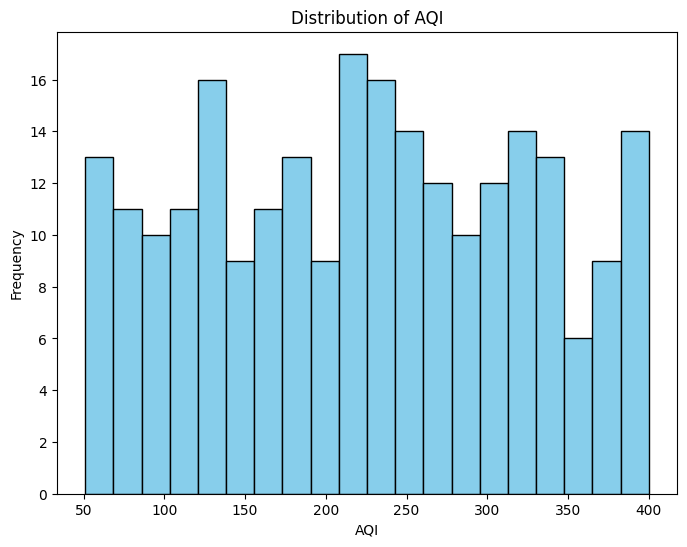

In [14]:
import matplotlib.pyplot as plt

# Histogram of AQI
plt.figure(figsize=(8, 6))
plt.hist(df['AQI'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Save the processed dataset
df.to_csv('processed_aqi_data.csv', index=False)